# **What Is Clustering?**
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


There is a popular method known as elbow method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.



To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE

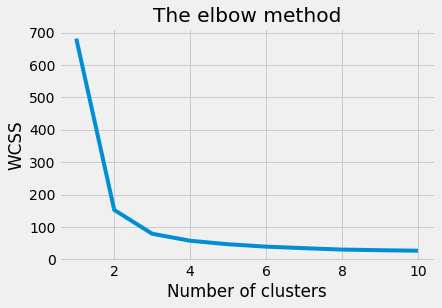

In [ ]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
# A list holds the SSE values for each k
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    # calculates squared error 
    # for the clustered points 
    wcss.append(kmeans.inertia_)
# plot the cost against K values   
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
# the point of the elbow is the  
# most optimal value for choosing k 

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

A Python package, kneed, to identify the elbow point programmatically:

In [ ]:
!pip install kneed


In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


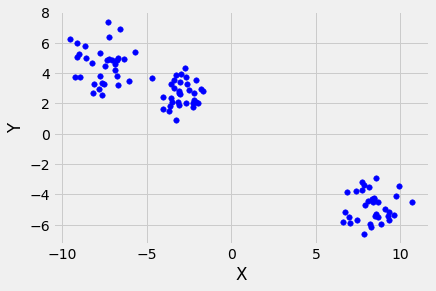

<Figure size 432x288 with 0 Axes>

In [ ]:
style.use("fivethirtyeight") 
  
# make_blobs() is used to generate sample points 
# around c centers (randomly chosen) 
X, y = make_blobs(n_samples = 100, centers =3 ,  
                cluster_std = 1, n_features = 2) 
                  
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b') 
  
# label the axes 
plt.xlabel('X') 
plt.ylabel('Y') 
  
plt.show() 
plt.clf() # clear the figure

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

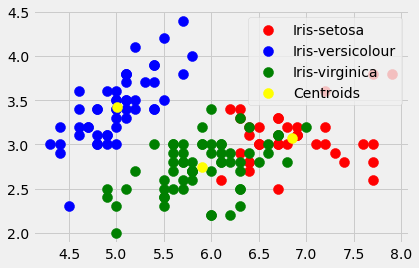

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()